## Exploratory Data Analysis
### Roles to Explore : 

In [6]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

## Filter for US Data Analyst Roles

In [7]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

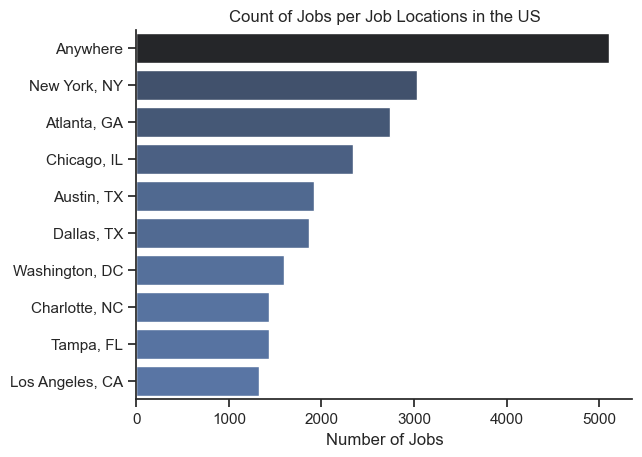

In [17]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Jobs per Job Locations in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

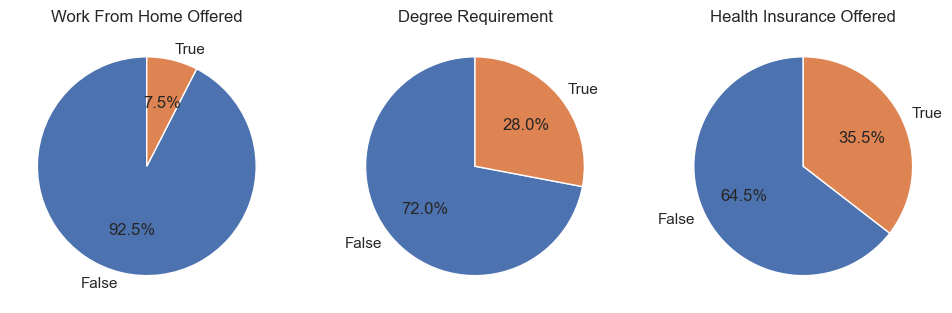

In [22]:
dict_column = {
    'job_work_from_home' : 'Work From Home Offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), autopct='%1.1f%%', startangle=90, labels=(['False', 'True']))
    ax[i].set_title(title)

plt.show()

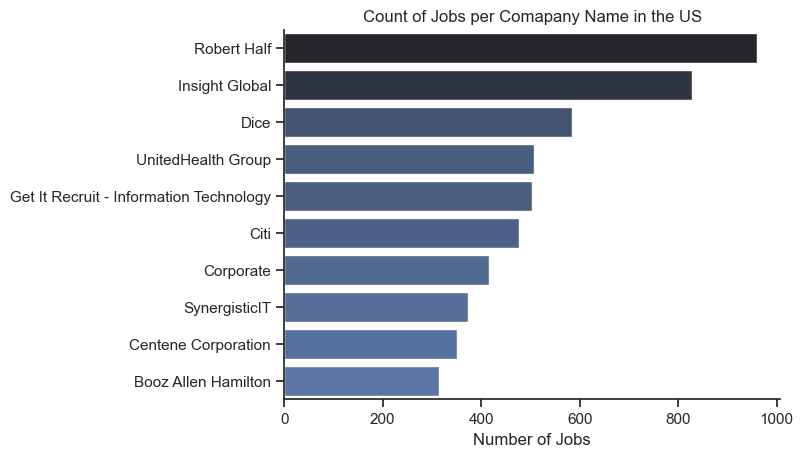

In [23]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Jobs per Comapany Name in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()